#### Importing Libariries to work on the project

In [130]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pandas_profiling

In [131]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [132]:
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Setting the Directory

In [133]:
os.chdir(r'E:\mine\Big Data & ML\project')
os.getcwd()

'E:\\mine\\Big Data & ML\\project'

Loading the file to do EDA and Modelling

In [134]:
dfreg=pd.read_csv('insurance.csv',na_values='NA')

Dataset Description

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance - Target variable

In [135]:
dfreg.shape

(1338, 7)

In [136]:
dfreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking for null values in the dataset

In [137]:
dfreg.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values present in the dataset

In [138]:
dfreg.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [139]:
dfreg.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [140]:
dfreg.astype('object').describe().transpose()

,count,unique,top,freq
age,1338,47,18,69
sex,1338,2,male,676
bmi,1338,548,32.3,13
children,1338,6,0,574
smoker,1338,2,no,1064
region,1338,4,southeast,364
charges,1338,1337,1639.56,2


In [141]:
dfreg.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Encoding

In [142]:
dfreg['sex'] = dfreg['sex'].apply(lambda x : 1 if x=='female' else 0)
dfreg['smoker'] = dfreg['smoker'].apply(lambda x : 1 if x=='yes' else 0)

In [143]:
dfreg=pd.concat([dfreg, pd.get_dummies(dfreg.region)], axis=1)
dfreg.drop('region', axis=1, inplace=True)

In [144]:
dfreg.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


###### Correlation Matrix

In [145]:
dfreg.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

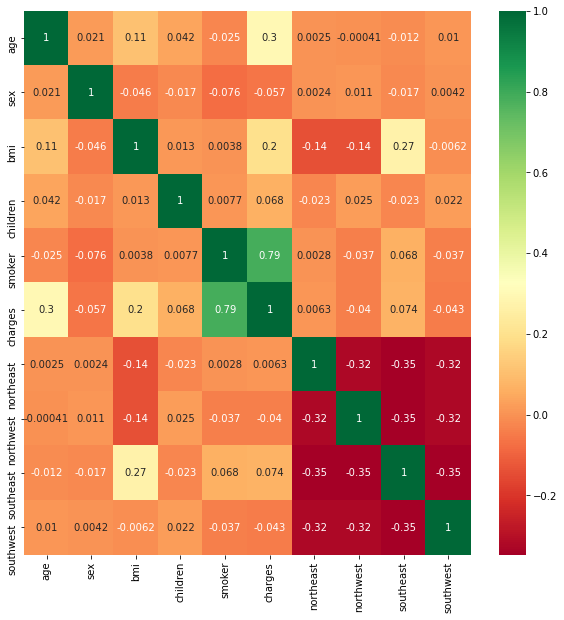

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(dfreg.corr(),annot=True,cmap='RdYlGn')

from correlation Matrix we can 

The all the four regions are negatively correlated .
Smoker and charges are positvely correlated
charges is positively correlated with age and bmi.

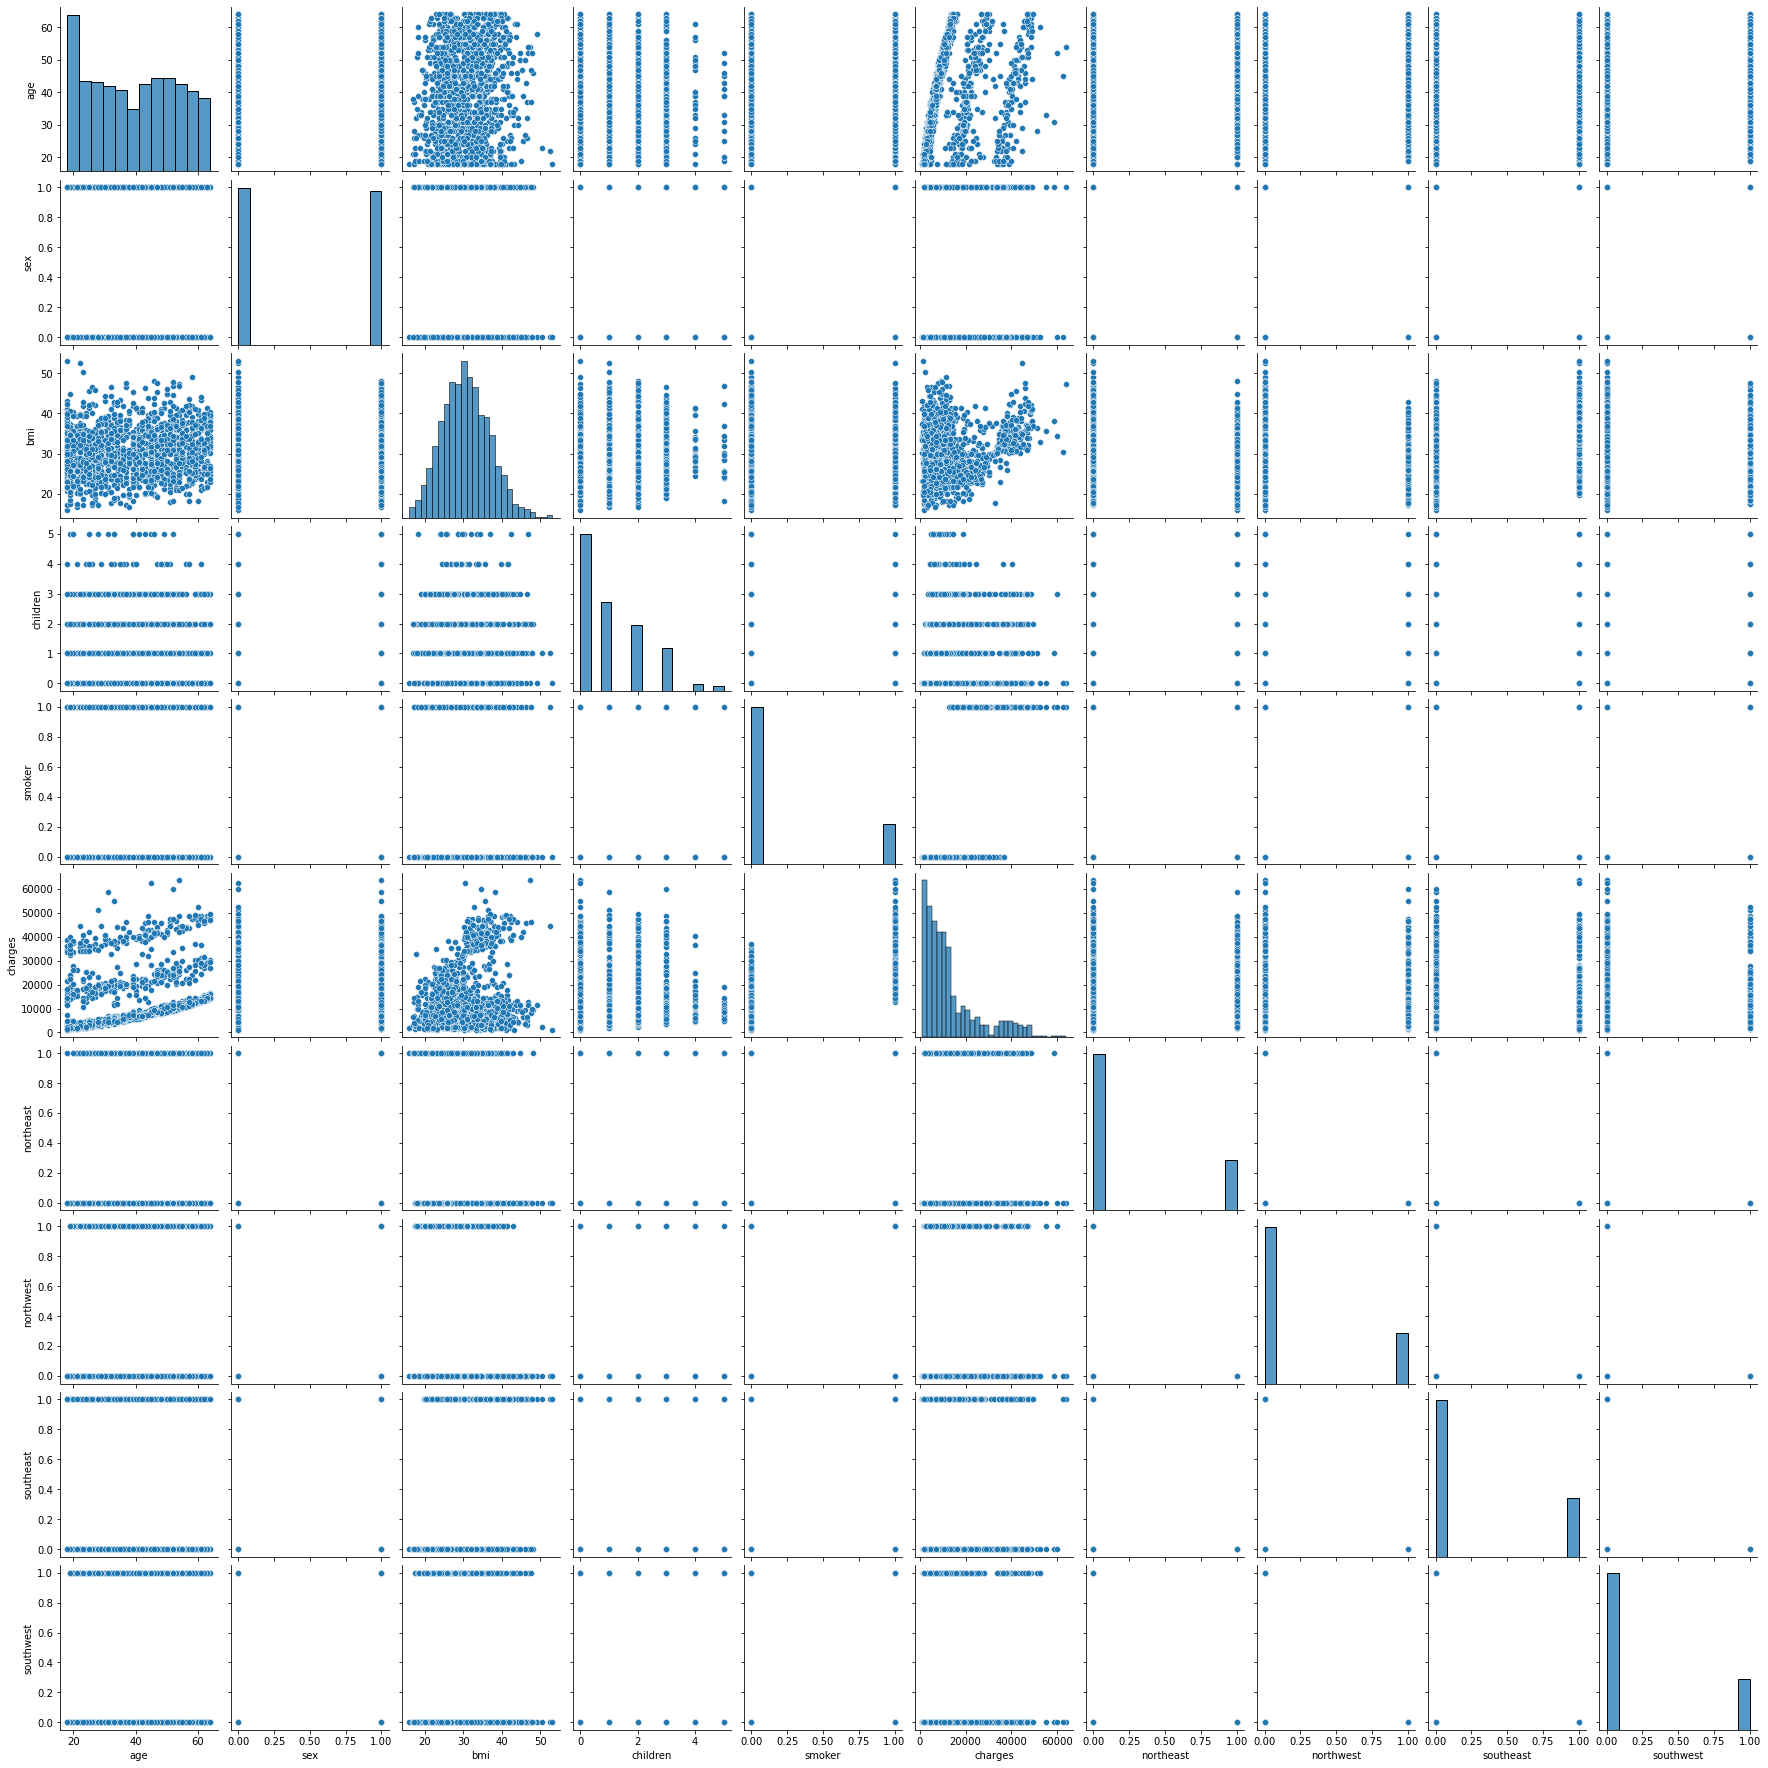

In [147]:
sns.pairplot(dfreg)

In [148]:
#red wine quality value count
Charges_value_count=dfreg["charges"].value_counts()
Charges_value_count

1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1
1980.07000     1
              ..
12269.68865    1
6360.99360     1
7371.77200     1
16420.49455    1
34254.05335    1
Name: charges, Length: 1337, dtype: int64

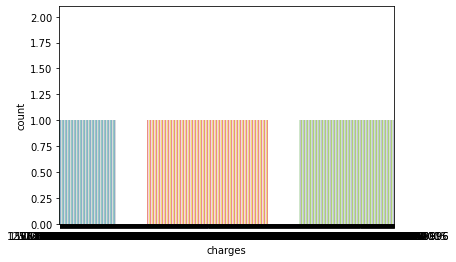

In [149]:
import seaborn as sns
graph = sns.countplot(x="charges", data=dfreg, palette="Set3")

In [150]:
dfreg.groupby('sex').count()*100/dfreg['sex'].count()

,age,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
sex,,,,,,,,,
0,50.523169,50.523169,50.523169,50.523169,50.523169,50.523169,50.523169,50.523169,50.523169
1,49.476831,49.476831,49.476831,49.476831,49.476831,49.476831,49.476831,49.476831,49.476831


the percentage of gender is almost same in all the categories.

In [151]:
dfreg.groupby('smoker').count() 

,age,sex,bmi,children,charges,northeast,northwest,southeast,southwest
smoker,,,,,,,,,
0,1064,1064,1064,1064,1064,1064,1064,1064,1064
1,274,274,274,274,274,274,274,274,274


there are more non-smokers in dataset than smokers

In [25]:
dfreg.groupby('children').count() 

,age,sex,bmi,smoker,charges,northeast,northwest,southeast,southwest
children,,,,,,,,,
0,574,574,574,574,574,574,574,574,574
1,324,324,324,324,324,324,324,324,324
2,240,240,240,240,240,240,240,240,240
3,157,157,157,157,157,157,157,157,157
4,25,25,25,25,25,25,25,25,25
5,18,18,18,18,18,18,18,18,18


More the children more the chances are there for being a non-smoker

<AxesSubplot:xlabel='sex', ylabel='count'>

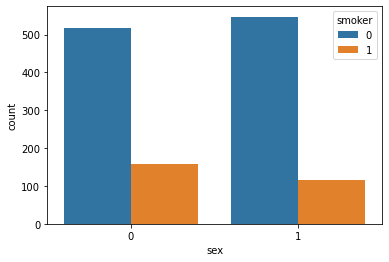

In [26]:
sns.countplot(dfreg['sex'],hue=dfreg['smoker']) 

there are  more male smokers  than female ones

<AxesSubplot:xlabel='age', ylabel='count'>

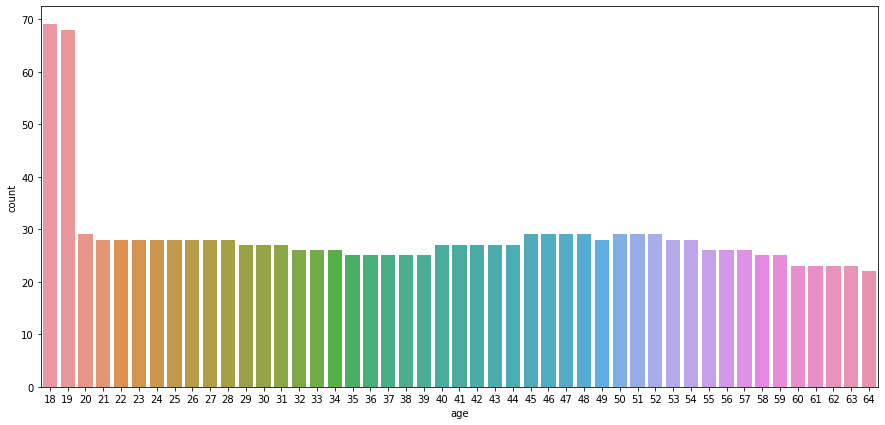

In [27]:
plt.figure(figsize=(15,7))   
sns.countplot(dfreg['age']) 

data for age 18-19 is more and for rest ages data is uniform

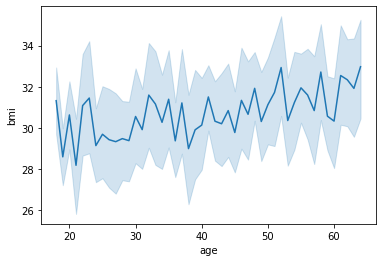

In [29]:
sns.lineplot(dfreg['age'],dfreg['bmi'])         
plt.show()

its showing a slight positive correlation between age and bmi

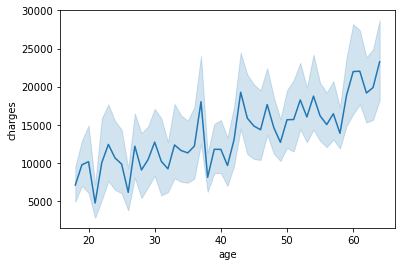

In [30]:
sns.lineplot(dfreg['age'],dfreg['charges'])
plt.show()

its shows age and charges are positively correlated

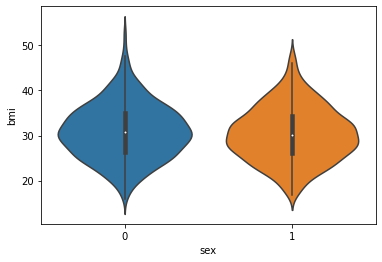

In [33]:
sns.violinplot(dfreg['sex'],dfreg['bmi'])  
plt.axhline(dfreg[dfreg['sex']=='female']['bmi'].mean())
plt.axhline(dfreg[dfreg['sex']=='male']['bmi'].mean())

for bmi and sex data is a bit normally distributed

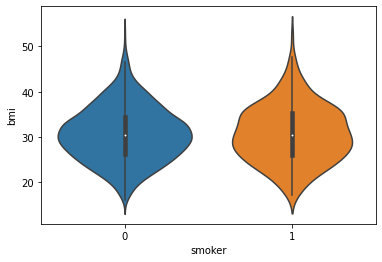

In [34]:
sns.violinplot(dfreg['smoker'],dfreg['bmi'])   
plt.axhline(dfreg[dfreg['smoker']=='yes']['bmi'].mean())
plt.axhline(dfreg[dfreg['smoker']=='no']['bmi'].mean())

here data is normally distributed

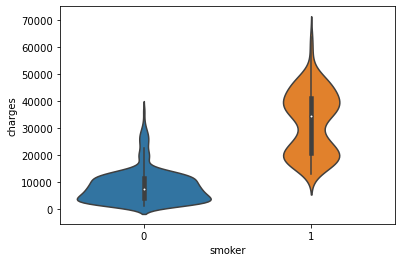

In [35]:
sns.violinplot(dfreg['smoker'],dfreg['charges'])   
plt.axhline(dfreg[dfreg['smoker']=='yes']['charges'].mean())
plt.axhline(dfreg[dfreg['smoker']=='no']['charges'].mean())

for smoker charges data is left skewed and non-smoker data is right skewed a bit

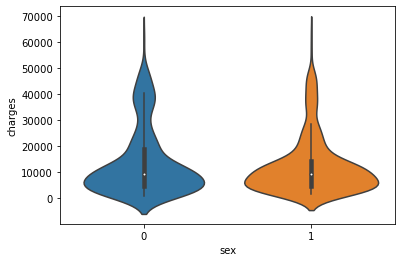

In [36]:
sns.violinplot(dfreg['sex'],dfreg['charges'])  
plt.axhline(dfreg[dfreg['sex']=='female']['charges'].mean())
plt.axhline(dfreg[dfreg['sex']=='male']['charges'].mean())

for sex,charges data is rightly skewed

###### Identifying and extracting the Dependent and Independent Variable

Dependant variable:- Charges

Independant Variable: Age, Sex, BMI , Children , Smoker , Region

In [152]:
X = dfreg.drop(['charges'],axis=1)
y = dfreg['charges']



In [153]:
X.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0


In [154]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [155]:
#Shuffle the rows of the dataframe
shuf = dfreg.sample(frac = 1, random_state=0)

In [156]:
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2.astype(float))
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        23:44:23   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.013e+04    791.569    -12.792      0.0

Since we have P Values more than 5% significance level we are going to do backward feature elimination in the next step.

In [157]:
#backward feature elimination
while (lr.pvalues.max()>0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True)
    ols = sm.OLS(y,X2)
    lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        23:44:25   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.006e+04    774.464    -12.991      0.0

After doing the backward feature elimination we still have multicollinearity problems , so in the next step we are going to drop the constant and do variance inflation factor 

In [158]:
X=X2.drop('const',axis=1) #we dont need constant column for sklearn package
X.head()

,age,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0,0,1
1,18,33.770,1,0,0,0,1,0
2,28,33.000,3,0,0,0,1,0
3,33,22.705,0,0,0,1,0,0
4,32,28.880,0,0,0,1,0,0


In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.25)

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_temp = sm.add_constant(X_train)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

   VIF Factor   features
0         0.0      const
1         1.0        age
2         1.1        bmi
3         1.0   children
4         1.0     smoker
5         inf  northeast
6         inf  northwest
7         inf  southeast
8         inf  southwest


By doing variance inflation factor we found out that all the four regions have infinite value (INF = infinity), So in next step we are dropping the all the four regions.

In [45]:
newdf=dfreg.drop(['southeast','northeast','northwest','southwest'], axis=1)
newdf.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [46]:
#Again we are extrating X Nd Y variable for the new dataset.

X_1 = newdf.drop(['charges'],axis=1)
Y_1= newdf['charges']
X_1.head()

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0


In [47]:
# doing the OLS regression for the new modified dataset


X_2 = sm.add_constant(X_1) 
ols = sm.OLS(Y_1,X_2.astype(float))
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        20:40:45   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.218e+04    963.902    -12.637      0.0

Since we have P Values more than 5% significance level we are going to do backward feature elimination in the next step.

In [48]:
#backward feature elimination
while (lr.pvalues.max()>0.05):
    X_2.drop(lr.pvalues.idxmax(),axis=1,inplace=True)
    ols = sm.OLS(Y_1,X_2)
    lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        20:40:46   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

After doing the backward feature elimination we can see that we don't have any more multicollinearity problems .In the next step we are going to split data and run the Linear regression model

In [49]:
#For cross-validation using train-test split
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X_1,Y_1,
                                                 random_state=1,test_size=0.2)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train,Y1_train)
model.score(X1_test,Y1_test)

0.7608581750738531

In [51]:
Y1_pred = model.predict(X1_test)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(r2_score(Y1_test,Y1_pred)) #R^2
print(mean_squared_error(Y1_test,Y1_pred)) #MSE
print(math.sqrt(mean_squared_error(Y1_test,Y1_pred))) #RMSE

0.7608581750738531
35699244.58251515
5974.884482775809


In [52]:
#k-fold cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X_1,Y_1,cv=4)# here i have done 4 fold since dataset is small

array([0.77132911, 0.71000507, 0.76541849, 0.73578597])

In [53]:
cross_val_score(LinearRegression(),X_1,Y_1,cv=4).mean()# here i have done 4 fold since dataset is small , 

0.745634659847217

In [59]:
#dimensions of data
n = len(X1_test)
k = len(X1_test.iloc[0])
Lr_R2 = r2_score(Y1_test,Y1_pred)
Lr_R2

0.7608581750738531

In [60]:
Adj_R2 = 1 - ((n-1)*(1- Lr_R2)/(n-k-1))
print(Adj_R2)

0.756294399789003


In [61]:
print("Mean Squarred Error: %.3f" % mean_squared_error(Y1_test,Y1_pred ))
print("RMSE:", math.sqrt(mean_squared_error(Y1_test, Y1_pred)))

Mean Squarred Error: 35699244.583
RMSE: 5974.884482775809


In [62]:
model = LinearRegression()
model.fit(X_1,Y_1)

LinearRegression()

In [63]:
model.intercept_

-12181.101839234441

In [64]:
model.coef_

array([  257.73498767,   128.63985357,   322.36421449,   474.41112061,
       23823.39253065])

From the Above Linear Regession model we can see that R2 is 76.62% , Adj R2 = 75.62 , RMSE = 5974.88

### K-Nearest Neighbor (KNN)

In [67]:
#For cross-validation using train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=1,test_size=0.2)

In [68]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test) 

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print ('train score',knn.score(X_train,y_train))
print ('test score',knn.score(X_test,y_test))

train score 0.8720739336699022
test score 0.8420950902760922


In [70]:
#see the cross_validated score for cv=4
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X,y,cv=4).mean()

0.07783477286958698

In [71]:
scores = []
for i in range(1,11,1):
    knn = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,X,y,cv=4).mean())

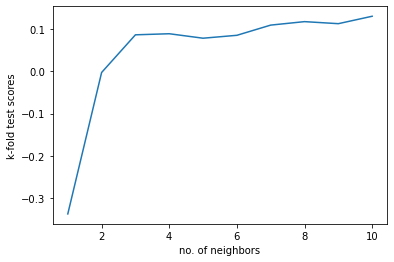

In [72]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()

From the above graph we can predict 10-NN is the best neighbors for the dataset. In the next step we are going to do Grid search to see hyper tunned results for the model

In [73]:
grid_params = {
            'n_neighbors': [9,11,13],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
        }
model = GridSearchCV(KNeighborsRegressor(), grid_params,cv=4)
model.fit(X,y)
print (grid_params)

{'n_neighbors': [9, 11, 13], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}


In [74]:
print (model.best_score_)

0.31630547407872056


In [75]:
print (model.best_params_) # the best params for my dataset using KNN model 

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [76]:
print (model.best_estimator_)

KNeighborsRegressor(metric='manhattan', n_neighbors=11, weights='distance')


In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [78]:
best_model=model.fit(X_train,y_train)
print (best_model)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [9, 11, 13],
                         'weights': ['uniform', 'distance']})


In [79]:
best_score= model.score(X_test,y_test)
print (best_score)

0.355451389756976


In [80]:
cross_val_score(KNeighborsRegressor(n_neighbors=11,weights='distance'),X,y,cv=4).mean()

0.164156515533242

In [81]:
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)


In [85]:
Knn_R2=r2_score(y_test,pred_knn)
Knn_R2
print("Knn_R2:", r2_score(y_test, pred_knn))
print("Adj_R2:", 1 - ((n-1)*(1- Knn_R2)/(n-k-1)))
print("Mean Squarred Error: %.3f" % mean_squared_error(y_test,pred_knn ))
print("RMSE:", math.sqrt(mean_squared_error(y_test, pred_knn)))

Knn_R2: 0.17502613273199152
Adj_R2: 0.15928235663909063
Mean Squarred Error: 110971717.022
RMSE: 10534.311416606573


From the Above KNN model we can see that R2 is 17.50 , Adj R2 = 15.92 , RMSE = 10534.31

### Randomn Forest

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
print ('train score',RFR.score(X_train,y_train))
print ('test score',RFR.score(X_test,y_test))

train score 0.9776760398186722
test score 0.8327545522488943


In [91]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(RandomForestRegressor(n_estimators=i,random_state=1),
                                  X,y,cv=4).mean())

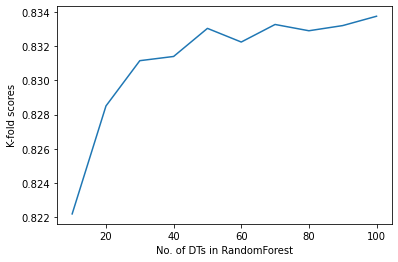

In [92]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

From the above graph we can predict  that 100 should the Decision trees in the Randomn forest model . In the next step we are going to do Grid search to see hyper tunned results for the model

In [93]:
params = {
            'n_estimators': [100,110,120,130],
            'max_depth': [13,14,15]
        }
modelr = GridSearchCV(RandomForestRegressor(), params,cv=4)
modelr.fit(X,y)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [13, 14, 15],
                         'n_estimators': [100, 110, 120, 130]})

In [94]:
modelr.best_params_

{'max_depth': 15, 'n_estimators': 130}

In [95]:
modelr.best_estimator_ # the best params for thr RF model

RandomForestRegressor(max_depth=15, n_estimators=130)

In [96]:
modelr.best_score_

0.8359762004131708

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [98]:
best_model=modelr.fit(X_train,y_train)
print (best_model)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [13, 14, 15],
                         'n_estimators': [100, 110, 120, 130]})


In [99]:
best_score= modelr.score(X_test,y_test)
print (best_score)

0.8302108711430964


In [100]:
cross_val_score(RandomForestRegressor(n_estimators=100,max_depth=15),X,y,cv=4).mean()

0.8346401089091782

In [101]:
RFR.fit(X_train, y_train)
pred_rfr = RFR.predict(X_test)
Rf_R2 = r2_score(y_test,pred_rfr)
Rf_R2
print("Rf_R2:", r2_score(y_test, pred_rfr))
print("Adj_R2:", 1 - ((n-1)*(1- Rf_R2)/(n-k-1)))
print("Mean Squarred Error: %.3f" % mean_squared_error(y_test,pred_rfr ))
print("RMSE:", math.sqrt(mean_squared_error(y_test, pred_rfr)))

Rf_R2: 0.8266417865117509
Adj_R2: 0.8233334236589217
Mean Squarred Error: 23319355.163
RMSE: 4829.011820504791


From the Above Randonm Forest model we can see that R2 is 82.66 , Adj R2 = 82.33 , RMSE = 4829.01

#### Adaboost

In [102]:
from sklearn.ensemble import AdaBoostRegressor
ABR = AdaBoostRegressor()
ABR.fit(X_train, y_train)
print ('train score',ABR.score(X_train,y_train))
print ('test score',ABR.score(X_test,y_test))

train score 0.8178016861699854
test score 0.7924095944369267


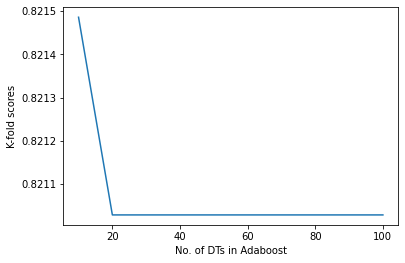

In [103]:


#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(AdaBoostRegressor(n_estimators=i,random_state=1),
                                  X,y,cv=4).mean())
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

From the above graph we can predict  that 20 should the Decision trees in the Adaboost  model . In the next step we are going to do Grid search to see hyper tunned results for the model

In [104]:
from sklearn.tree import DecisionTreeRegressor
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [10,20,30,40],
            'base_estimator': [DecisionTreeRegressor(max_depth=9,random_state=0),
                               DecisionTreeRegressor(max_depth=10,random_state=0),
                               DecisionTreeRegressor(max_depth=11,random_state=0)]
        }
modela = GridSearchCV(AdaBoostRegressor(random_state=0), params,cv=4)
modela.fit(X,y)

GridSearchCV(cv=4, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=9,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=10,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=11,
                                                                  random_state=0)],
                         'n_estimators': [10, 20, 30, 40]})

In [105]:
modela.best_params_ # the best params for my Adaboost model

{'base_estimator': DecisionTreeRegressor(max_depth=10, random_state=0),
 'n_estimators': 20}

In [106]:
modela.best_estimator_ 

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                       random_state=0),
                  n_estimators=20, random_state=0)

In [107]:
modela.best_score_

0.8241394903644754

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [109]:
best_model=modela.fit(X_train,y_train)
print (best_model)

GridSearchCV(cv=4, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=9,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=10,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=11,
                                                                  random_state=0)],
                         'n_estimators': [10, 20, 30, 40]})


In [110]:
best_score= modela.score(X_test,y_test)
print (best_score)

0.8089986455109707


In [111]:
cross_val_score(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,random_state=0),n_estimators=20,random_state=0),X,y,cv=4).mean()

0.8241394903644754

In [112]:
ABR.fit(X_train, y_train)
pred_abr = ABR.predict(X_test)
Ab_R2 = r2_score(y_test,pred_abr)
Ab_R2

print("Ab_R2:", r2_score(y_test, pred_abr))
print("Adj_R2:", 1 - ((n-1)*(1- Ab_R2)/(n-k-1)))
print("Mean Squarred Error: %.3f" % mean_squared_error(y_test,pred_abr))
print("RMSE:", math.sqrt(mean_squared_error(y_test, pred_abr)))

Ab_R2: 0.743888893459611
Adj_R2: 0.7390012769225807
Mean Squarred Error: 34450896.409
RMSE: 5869.488598573416


From the Above Adaboost model we can see that R2 is 74.38 , Adj R2 = 73.90 , RMSE = 5869.48

#### SVR

In [113]:
from sklearn.svm import SVR

In [114]:
regressor= SVR(kernel='rbf')

In [115]:
regressor.fit(X_train,y_train)

SVR()

In [116]:
params_dictionary = {
                        'C' : [0.1, 1, 10],
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                        'degree': [2,3]
                    }

modelv = GridSearchCV(SVR(),param_grid=params_dictionary,cv=4)

In [117]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                'C': [ 0.01, 0.1, 1, 10] }
modelv = GridSearchCV(SVR(),param_grid=parameters,cv=4)


In [118]:
modelv.fit(X,y)

GridSearchCV(cv=4, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['rbf', 'sigmoid']})

In [119]:
modelv.best_params_ # this the best params for my SVR model

{'C': 10, 'kernel': 'rbf'}

In [120]:
modelv.best_score_

-0.1013432459535687

In [121]:
svr =modelv.best_estimator_

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [123]:
svr.fit(X_train,y_train)

SVR(C=10)

In [124]:
svr.score(X_test,y_test)

-0.08575833104329633

In [125]:

cross_val_score(SVR(C = 10,  kernel = 'rbf'),X,y,cv=4).mean()

-0.1013432459535687

In [126]:
regressor.fit(X_train, y_train)
pred_svr = regressor.predict(X_test)
Svr_R2 = r2_score(y_test,pred_svr)
Svr_R2
print("Svr_R2:", r2_score(y_test, pred_svr))
print("Adj_R2:", 1 - ((n-1)*(1- Svr_R2)/(n-k-1)))
print("Mean Squarred Error: %.3f" % mean_squared_error(y_test,pred_svr))
print("RMSE:", math.sqrt(mean_squared_error(y_test, pred_svr)))

Svr_R2: -0.09775359078750201
Adj_R2: -0.11870308679489705
Mean Squarred Error: 172824301.730
RMSE: 13146.265695239175


From the Above SVR model we can see that R2 is -0.09 , Adj R2 = -0.11 , RMSE = 13146.26

Conclusion:


Linear Regression
cross value score = 74.56
R2 =76.08
Adj R2 = 75.62
RMSE = 5974.88


Knn 
cross value score = 16.41
R2 =17.50
Adj R2 =15.92
RMSE = 10534.31

Randonm Forest 
cross value score = 83.46
R2 =82.66
Adj R2 =82.33
RMSE =4829.01

Adaboost

cross value score = 82.41
R2 = 74.38
Adj R2 =73.90
RMSE = 5869.48

SVR
cross value score = -0.10
R2 =-0.09
Adj R2 =-0.12
RMSE = 13146



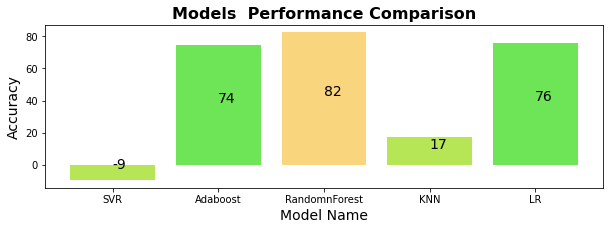

In [129]:
import numpy as np
import matplotlib.pyplot as plt


r2_scores = [Svr_R2*100, Ab_R2*100, Rf_R2*100,Knn_R2*100,Lr_R2*100]
model_names = ['SVR', 'Adaboost', 'RandomnForest','KNN','LR']

total_bar = np.arange(len(model_names))
color = ['#9edd1d', '#3edd1d', '#f7c851']

fig, ax = plt.subplots(figsize=(10, 3))
bar = plt.bar(model_names, r2_scores, align='center', alpha=.75, color=color)
plt.xticks(total_bar, model_names)
plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Models  Performance Comparison', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

From the above scores and graph we can see that Randomn Forest is a better model and gives a better score for the dataset